In [1]:
import pandas as pd

In [2]:
LabourData = pd.read_csv('D:\data science\csv\Linear_Regn_LabourData.csv')

In [3]:
LabourData.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
LabourData.tail()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
15987,22,HighSchool,black,NotHispanic,NotMarried,0,3975.352,6801.435,2757.438
15988,20,HighSchool,black,NotHispanic,Married,0,1445.939,11832.240,6895.072
15989,37,HighSchool,NotBlack,NotHispanic,NotMarried,0,1733.951,1559.371,4221.865
15990,47,LessThanHighSchool,NotBlack,NotHispanic,Married,1,16914.350,11384.660,13671.930
15991,40,LessThanHighSchool,NotBlack,NotHispanic,NotMarried,1,13628.660,13144.550,7979.724


In [5]:
LabourData.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [6]:
LabourData.describe(include='object')

,Eduacation,Race,Hisp,MaritalStatus
count,15992,15992,15992,15992
unique,5,2,2,2
top,HighSchool,NotBlack,NotHispanic,Married
freq,6252,14816,14840,11382


In [7]:
LabourData.Eduacation.value_counts(1)

HighSchool            0.390945
LessThanHighSchool    0.295835
Intermediate          0.169335
graduate              0.085480
PostGraduate          0.058404
Name: Eduacation, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

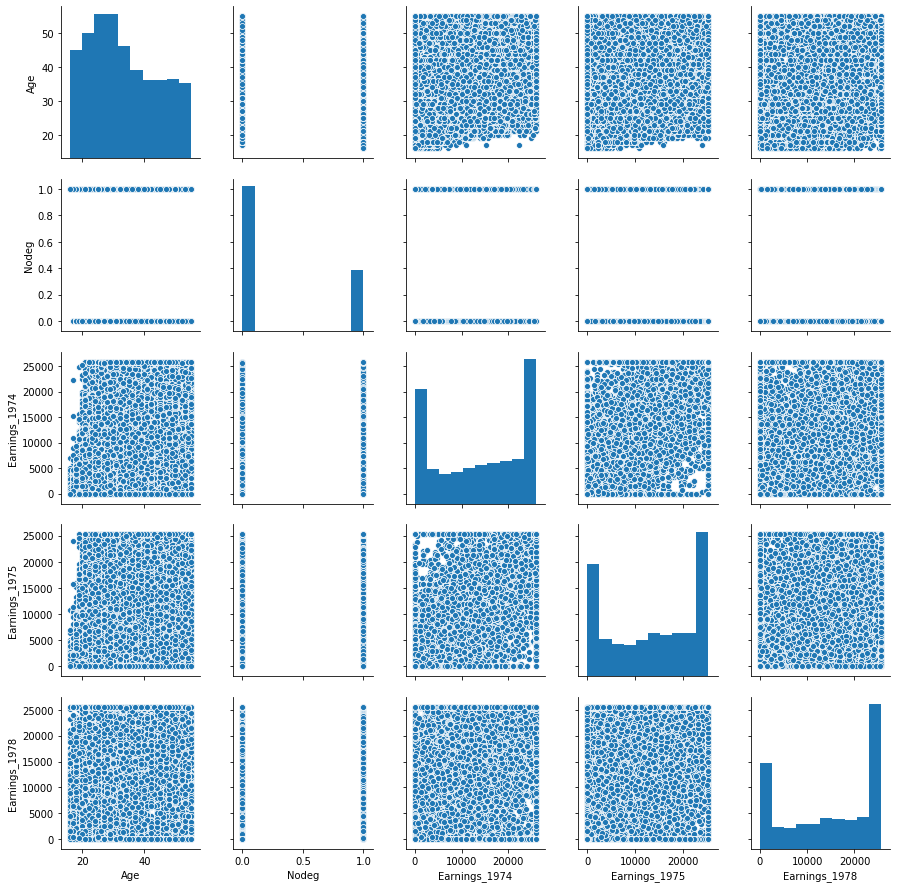

In [9]:
#pair plot of all variables to look at correlation
sns.pairplot(LabourData)

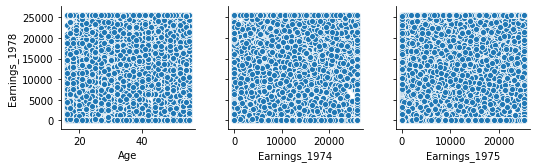

In [10]:
sns.pairplot(LabourData, x_vars=['Age','Earnings_1974','Earnings_1975'], y_vars='Earnings_1978')

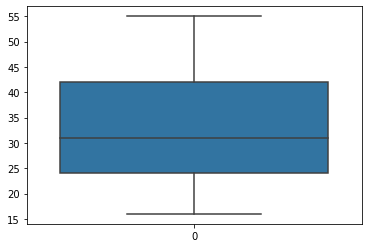

In [11]:
sns.boxplot(data=LabourData['Age'])

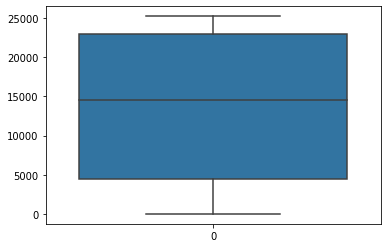

In [12]:
sns.boxplot(data=LabourData['Earnings_1975'])

# Exploration of Categorical Variables

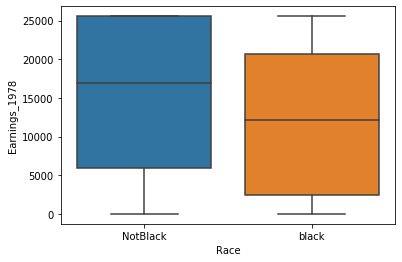

In [13]:
sns.boxplot(x = 'Race', y='Earnings_1978', data=LabourData)

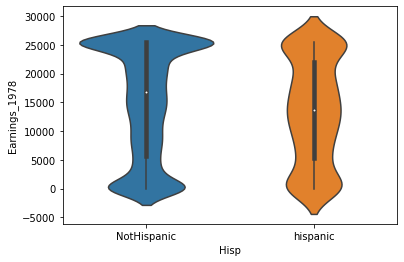

In [14]:
sns.violinplot(x=LabourData['Hisp'], y=LabourData['Earnings_1978'])

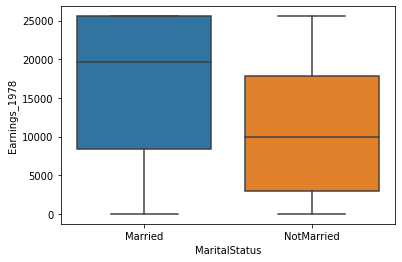

In [15]:
sns.boxplot(x=LabourData['MaritalStatus'], y=LabourData['Earnings_1978'])

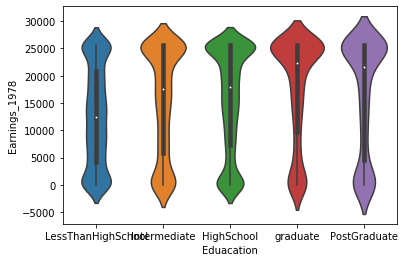

In [16]:
sns.violinplot(x=LabourData['Eduacation'], y=LabourData['Earnings_1978'])

In [17]:
#Seperating the numerical data
LabourData_num = LabourData[['Age','Nodeg','Earnings_1974','Earnings_1975','Earnings_1978']]

In [18]:
#dummyfying the categorical data
LabourData_dummy = pd.get_dummies(LabourData[['Race','Hisp','MaritalStatus','Eduacation']])

In [19]:
LabourData_combined = pd.concat([LabourData_num,LabourData_dummy], axis=1)

In [20]:
LabourData_combined.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Race_NotBlack,Race_black,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate
0,45,1,21516.670,25243.550,25564.670,1,0,1,0,1,0,0,0,1,0,0
1,21,0,3175.971,5852.565,13496.080,1,0,1,0,0,1,0,1,0,0,0
2,38,0,23039.020,25130.760,25564.670,1,0,1,0,1,0,1,0,0,0,0
3,48,1,24994.370,25243.550,25564.670,1,0,1,0,1,0,0,0,1,0,0
4,18,1,1669.295,10727.610,9860.869,1,0,1,0,1,0,0,0,1,0,0


In [21]:
#Splitting the data into train and test
LabourData_combined.columns

Index(['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978',
       'Race_NotBlack', 'Race_black', 'Hisp_NotHispanic', 'Hisp_hispanic',
       'MaritalStatus_Married', 'MaritalStatus_NotMarried',
       'Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate'],
      dtype='object')

In [22]:
X = LabourData_combined[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975','Race_NotBlack', 'Race_black', 'Hisp_NotHispanic', 'Hisp_hispanic',
       'MaritalStatus_Married', 'MaritalStatus_NotMarried',
       'Eduacation_HighSchool', 'Eduacation_Intermediate',
       'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate',
       'Eduacation_graduate']]

In [23]:
Y = LabourData_combined['Earnings_1978']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state=100)

# Performing Linear Regerssion

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [41]:
#fit the model to training data
lm.fit(X_train,y_train)
print(lm.predict(X_test))

[16540.04007348 21097.91690793 21837.01538353 ... 16316.77749664
 16704.39653636 10399.89541609]


In [42]:
#print the intercept
type(lm.intercept_)
lm.intercept_

7502.9051563759585

In [30]:
lm.coef_

array([-1.05198175e+02, -2.91754984e+02,  2.87448995e-01,  4.77042357e-01,
        4.55276440e+02, -4.55276440e+02,  3.18966611e+02, -3.18966611e+02,
       -6.79838205e+00,  6.79838205e+00, -4.06999763e+02, -2.70512443e+02,
       -2.91754984e+02,  5.90886229e+02,  3.78380960e+02])

In [31]:
#lets see the coefficients
coef_df = pd.DataFrame(lm.coef_, X_test.columns, columns=['Coefficient'])

In [32]:
coef_df

,Coefficient
Age,-105.198175
Nodeg,-291.754984
Earnings_1974,0.287449
Earnings_1975,0.477042
Race_NotBlack,455.276440
Race_black,-455.276440
Hisp_NotHispanic,318.966611
Hisp_hispanic,-318.966611
MaritalStatus_Married,-6.798382
MaritalStatus_NotMarried,6.798382


In [33]:
import statsmodels.api as sm

In [34]:
X_train_sm = X_train

In [35]:
X_train_sm = sm.add_constant(X_train_sm)

C:\Users\Working\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
lm_1 = sm.OLS(y_train, X_train_sm).fit()

In [37]:
#print coefficients
lm_1.params

const                            2756.169241
Age                              -105.198175
Nodeg                              14.486043
Earnings_1974                       0.287449
Earnings_1975                       0.477042
Race_NotBlack                    1833.361060
Race_black                        922.808181
Hisp_NotHispanic                 1697.051231
Hisp_hispanic                    1059.118010
MaritalStatus_Married            1371.286239
MaritalStatus_NotMarried         1384.883003
Eduacation_HighSchool             205.482290
Eduacation_Intermediate           341.969611
Eduacation_LessThanHighSchool      14.486043
Eduacation_PostGraduate          1203.368283
Eduacation_graduate               990.863014
dtype: float64

In [38]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        22:30:49   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          2756.1692    103.746     26.566      0.000    2552.808    2959.530
Age                            -105.1982      6.927    -15.187      0.000    -118.776     -91.620
Nodeg                            14.4860     70.800      0.205      0.838    -124.295     153.267
Earnings_1974                     0.2874      0.015     19.804      0.000       0.259       0.316
Earnings_1975                     0.4770      0.015     32.677      0.000       0.448       0.506
Race_NotBlack                  1833.3611    115.143     15.922      0.000    1607.660    2059.062
Race_black                      922.8082    155.988      5.916      0.000     617.045    1228.572
Hisp_NotHispanic               1697.0512    116.367     14.584      0.000    1468.952    1925.151
Hisp_hispanic                  1059.1180    158.368      6.688      0.000     748.689    1369.547
MaritalStatus_Married          1371.2862    109.402     12.534      0.000    1156.840    1585.733
MaritalStatus_NotMarried       1384.8830     87.820     15.770      0.000    1212.741    1557.025
Eduacation_HighSchool           205.4823    118.181      1.739      0.082     -26.173     437.138
Eduacation_Intermediate         341.9696    150.048      2.279      0.023      47.849     636.091
Eduacation_LessThanHighSchool    14.4860     70.800      0.205      0.838    -124.295     153.267
Eduacation_PostGraduate        1203.3683    231.089      5.207      0.000     750.393    1656.344
Eduacation_graduate             990.8630    194.046      5.106      0.000     610.498    1371.228
==============================================================================
Omnibus:                     1109.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1997.641
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       4.555   Cond. No.                     2.53e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.67e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

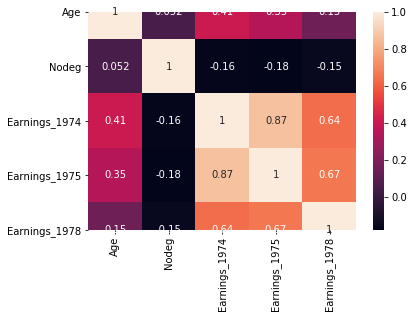

In [39]:
sns.heatmap(LabourData_num.corr(), annot=True)